### Notebook para analizar los resultados obtenidos de la simulación de Ising

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv

## Magnetización a lo largo de la evolución

### Lo usamos para verificar que el sistema ha termalizado correctamente

global T_range
T_step = 0.1 # Paso entre cada temperatura para la que se va a ejecutar
T_fine_step = 0.01 # Paso más fino para temperaturas cercanas a la crítica

T_range = np.concatenate((
    np.arange(4.0, 2.4, -T_step),
    np.arange(2.4, 2.0, -T_fine_step),
    np.arange(2.4, 0.0, -T_step)
))

L = 10


for T in  T_range:
    T = round(T, 3)
    M = 500 # Número de medidas a realizar
    M0 = 100 # Número de pasos Monte Carlo hasta termalizar
    mc = 5 # Número de pasos Monte Carlo entre cada medida
    
    if T > 2.0 and T < 2.4: M0 = 500 # Más pasos de termalización cerca de T_c
    df = pd.read_csv(f'./Resultados/rm0_{L}_{T}_{M0}_{M}_{mc}.csv', header= None)
    data = df.to_numpy()[0]
    M = len(data)
    
    fig, ax = plt.subplots()
    ax.set_title(f"T = {T}")
    ax.set_ylim(-0.1, 1.1)
    ax.scatter(range(M), data, marker='.')


## Estados finales del sistema

for T in  T_range:
    T = round(T, 2)
    df = pd.read_csv(f'./Resultados/sfina_{L}_{T}_{M0}_{M}_{mc}.csv', header= None)
    data = df.to_numpy()[0]
    N = len(data)
    L = int(np.sqrt(N))
    
    
    fig, ax = plt.subplots()
    ax.set_title(f"T = {T}")
    ax.imshow(np.reshape(data, (L,L)), cmap='binary_r')
    # cmap = 'binary_r': negro = +1, blanco = -1
    

## Medidas generales

In [48]:
df = pd.read_csv(f'./Resultados/medidas.csv')
df.tail(5)


,T,L,M,M0,mc,rm,rm2,rm4,error,mc*tau,c,time_of_save
354,0.5,100,500,100,5,1.0,1.0,1.0,0.0,0.0,0.0,2024-03-23 17:29:58.755644
355,0.4,100,500,100,5,1.0,1.0,1.0,0.0,0.0,0.0,2024-03-23 17:31:40.864356
356,0.3,100,500,100,5,1.0,1.0,1.0,0.0,0.0,0.0,2024-03-23 17:33:23.523452
357,0.2,100,500,100,5,1.0,1.0,1.0,0.0,0.0,0.0,2024-03-23 17:35:05.675091
358,0.1,100,500,100,5,1.0,1.0,1.0,0.0,0.0,0.0,2024-03-23 17:36:47.599473


In [49]:
# Cargamos los datos del dataframe en arrays
L_list = [10, 20, 40, 100]
n = len(L_list)

T_array = np.zeros((n, 76))

rm_array =  np.zeros((n, 76))
rm2_array = np.zeros((n, 76))
rm4_array = np.zeros((n, 76))

mctau_array = np.zeros((n, 76))
error_array = np.zeros((n, 76))
c_array = np.zeros((n, 76))

for i, L in enumerate(L_list):
    T_array[i, :] = df[df['L']==L]['T']

    rm_array[i, :] = df[df['L']==L]['rm']
    rm2_array[i, :] = df[df['L']==L]['rm2']
    rm4_array[i, :] = df[df['L']==L]['rm4']

    mctau_array[i, :] = df[df['L']==L]['mc*tau']
    error_array[i, :] = df[df['L']==L]['error']
    c_array[i, :] = df[df['L']==L]['c']


### Diapositiva [45]

Faltaría dibujar la curva teórica y la línea vertical con la Tc

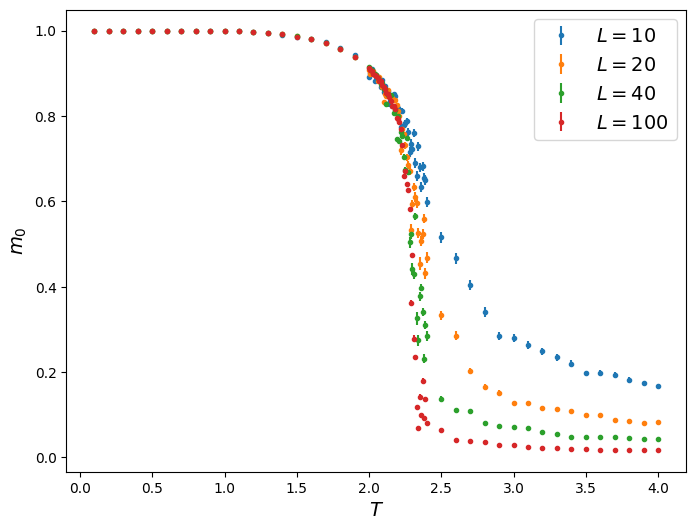

In [50]:

fig, ax = plt.subplots(figsize=(8,6))
ax.set_xlabel(f"$T$", fontsize = 14)
ax.set_ylabel(f"$m_0$", fontsize = 14)

for i, L in enumerate(L_list):
    ax.errorbar(T_array[i,:], rm_array[i,:], error_array[i,:], fmt='.', label=f"$L = {L}$")

ax.legend(fontsize = 14)    


## Queda pendiente determinar la temperatura crítica


### Diapositiva [51]. Gráfica (a)

De aquí obtenemos Tc

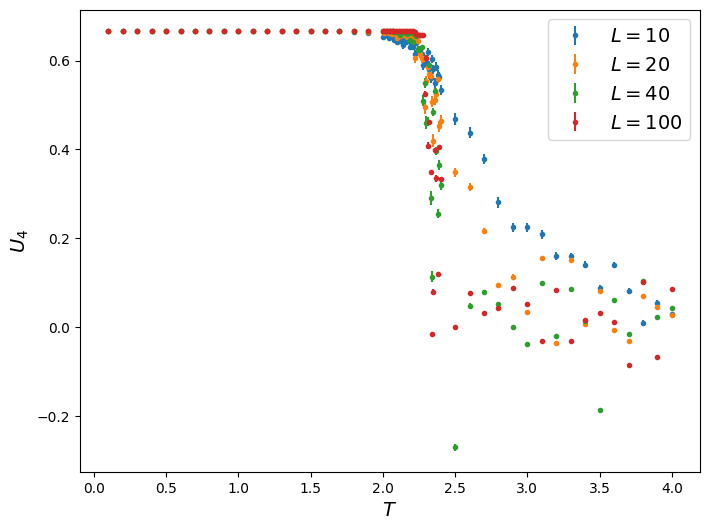

In [51]:

# U_4 = U_4(T,L)
U4 = 1 - rm4_array / (3*rm2_array**2)

fig, ax = plt.subplots(figsize=(8,6))
ax.set_xlabel(f"$T$", fontsize = 14)
ax.set_ylabel(f"$U_4$", fontsize = 14)

for i, L in enumerate(L_list):
    # ax.plot(T_array[i,:], U4[i,:])
    ax.errorbar(T_array[i,:], U4[i,:], error_array[i,:], fmt='.', label=f"$L = {L}$")

ax.legend(fontsize = 14)   


### Ecuación (72)

$ m_0(T) \approx | 1 - T/T_c |^\beta $

C:\Windows\Temp\ipykernel_13072\4284879925.py:3: RuntimeWarning: divide by zero encountered in log
  x = np.log(1 - T_array / Tc)[0,:]
C:\Windows\Temp\ipykernel_13072\4284879925.py:3: RuntimeWarning: invalid value encountered in log
  x = np.log(1 - T_array / Tc)[0,:]


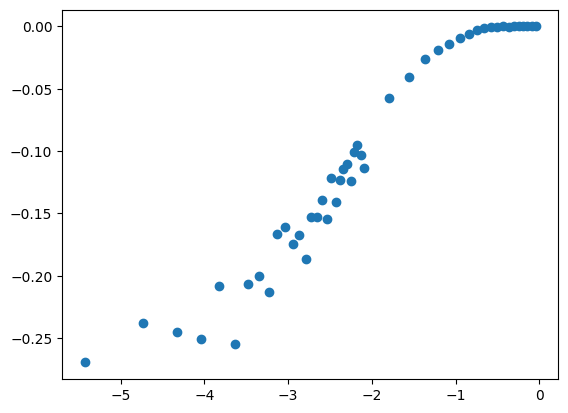

In [52]:
Tc = 2.28

x = np.log(1 - T_array / Tc)[0,:]
y = np.log(rm_array)[0,:]

plt.scatter(x, y)

# np.polyfit(x, y, 1)


### Diapositiva [47]

 χT =
N
kT [hm2
i − hmi
2
],

In [53]:
Xi = N * k * T

NameError: name 'N' is not defined